# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.050421e+01     7.603590e+00
 * time: 0.0014781951904296875
     1     2.640183e+01     5.354557e+00
 * time: 0.0068089962005615234
     2     1.742918e+01     3.798474e+00
 * time: 0.01271200180053711
     3     1.137057e+01     2.338331e+00
 * time: 0.017132997512817383
     4     1.023272e+01     1.559058e+00
 * time: 0.020390987396240234
     5     9.538748e+00     1.568754e+00
 * time: 0.023473024368286133
     6     9.047212e+00     1.101317e+00
 * time: 0.02640819549560547
     7     8.761523e+00     8.288701e-01
 * time: 0.029671192169189453
     8     8.460900e+00     7.301336e-01
 * time: 0.032935142517089844
     9     8.225838e+00     5.609724e-01
 * time: 0.0362851619720459
    10     8.067223e+00     5.267530e-01
 * time: 0.03989410400390625
    11     7.975771e+00     3.175624e-01
 * time: 0.04403519630432129
    12     7.962835e+00     5.453684e-01
 * time: 0.04678916931152344
    13     7.958793e+00     6.033546e-01


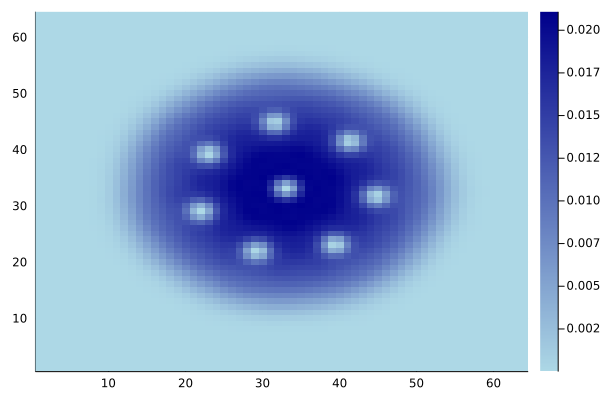

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)